# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rifqi Yafik]
- **Email:** [rifqiyafika50@gmail.com]
- **ID Dicoding:** [yagamiee]

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan Sewa Sepeda pada hari kerja dengan hari libur?
2. Jam berapa saja waktu puncak untuk penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


## Data Wrangling

### Gathering Data

Pengambilan data yang telah di upload

In [4]:
day_data = pd.read_csv('/content/day.csv')

In [5]:
hour_data = pd.read_csv('/content/hour.csv')

menampilkan data untuk dilihat bagaimana Struktur Data nya

In [6]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pengambilan Data mentah.
- Penting untuk memahami bagaimana data dikumpulkan dan dari mana asalnya untuk memastikan kualitas dan relevansi data untuk analisis lebih lanjut.


### Assessing Data

Menilai Tabel day_data

In [8]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
print(day_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [10]:
print(day_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Mengecek apakah ada data yang hilang di dalam kolom.

In [11]:
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Melihat apakah ada baris data yang duplikat

In [12]:
print("Jumlah duplikasi data: ", day_data.duplicated().sum())

Jumlah duplikasi data:  0


In [13]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Tabel hour_data**

In [14]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
print(hour_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [16]:
print(hour_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [17]:
hour_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [18]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


Menilai apakah ada nilai yang tidak sesuai dengan pola atau standar

In [19]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Missing values: Jika ada data yang hilang, misalnya kolom yang kosong, ini mungkin membutuhkan strategi pengisian atau penghapusan.
- Outliers: Jika ada nilai yang sangat jauh dari distribusi umum (misalnya jumlah penyewaan yang sangat tinggi pada waktu tertentu), hal ini perlu dipertimbangkan apakah outlier tersebut valid atau kesalahan input.
- Duplikat: Duplikat baris dapat menunjukkan pengulangan atau kesalahan dalam input data yang harus dibersihkan.

### Cleaning Data

Menghapus data yang hilang

In [20]:
day_data_cleaned = day_data.dropna()

In [21]:
hour_data_cleaned = hour_data.dropna()

Menghapus Baris Duplikat

In [22]:
day_data_cleaned = day_data_cleaned.drop_duplicates()

Mengubah kolom 'dteday' menjadi datetime

In [23]:
day_data_cleaned['dteday'] = pd.to_datetime(day_data_cleaned['dteday'])

In [24]:
# Memisahkan data hari kerja dan hari libur
working_day_rentals = day_data_cleaned[day_data_cleaned['holiday'] == 0]['cnt']
holiday_rentals = day_data_cleaned[day_data_cleaned['holiday'] == 1]['cnt']

**Insight:**
- Data yang sudah dibersihkan akan lebih mudah dianalisis karena kita sudah menghilangkan masalah yang bisa menyebabkan bias atau kesalahan dalam analisis.
- Setelah membersihkan data, kita bisa melakukan analisis atau visualisasi.

## Exploratory Data Analysis (EDA)

### Explore ...

##### 1. Bagaimana perbandingan Sewa Sepeda pada Hari Kerja dengan Hari Libur?


Pengelompokkan data berdasarkan Hari Kerja(workingday) dan Hari Libur(holiday)

In [25]:
working_day_stats = day_data_cleaned[day_data_cleaned['holiday'] == 0]['cnt']
working_day_stats.describe()

,cnt
count,710.000000
mean,4527.104225
std,1929.013947
min,22.000000
25%,3214.000000
50%,4558.000000
75%,5932.750000
max,8714.000000


In [26]:
holiday_stats = day_data_cleaned[day_data_cleaned['holiday'] == 1]['cnt']
holiday_stats.describe()


,cnt
count,21.00000
mean,3735.00000
std,2103.35066
min,1000.00000
25%,1951.00000
50%,3351.00000
75%,6034.00000
max,7403.00000


**Insight:**

Dapat dilihat bahwa jumlah penyewaan sepeda biasanya lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini mungkin karena sepeda digunakan sebagai alat transportasi untuk bekerja atau ke sekolah pada hari kerja, sementara pada hari libur penggunaannya berkurang.

##### 2. Jam berapa saja waktu puncak untuk penyewaan sepeda?


Pengelompokkan data berdasarkan kolom jam (hr) dan jumlah penyewa (cnt) untuk setiap jam

In [27]:
hourly_rentals = hour_data_cleaned.groupby('hr')['cnt'].sum().reset_index()
hourly_rentals.describe()

,hr,cnt
count,24.000000,24.000000
mean,11.500000,137194.958333
std,7.071068,95894.380180
min,0.000000,4428.000000
25%,5.750000,51131.500000
50%,11.500000,152745.500000
75%,17.250000,184540.250000
max,23.000000,336860.000000


In [31]:
peak_hour = hourly_rentals.sort_values(by='cnt', ascending=False)
print("Top 20 Peak Hours:\n", peak_hour.head(20))
# mengambil data top 1
top_hour = peak_hour.iloc[0]
print(f"Jam puncak penyewaan adalah pukul {top_hour['hr']} dengan jumlah penyewaan: {top_hour['cnt']}")

Top 20 Peak Hours:
     hr     cnt
17  17  336860
18  18  309772
8    8  261001
16  16  227748
19  19  226789
13  13  184919
12  12  184414
15  15  183149
14  14  175652
20  20  164550
9    9  159438
7    7  154171
11  11  151320
10  10  126257
21  21  125445
22  22   95612
23  23   63941
6    6   55132
0    0   39130
1    1   24164
Jam puncak penyewaan adalah pukul 17 dengan jumlah penyewaan: 336860


**Insight:**
- jam puncak untuk penyewaan sepeda terjadi pada jam pagi hari (sekitar pukul 7 - 9) dan sore hari (sekitar pukul 17 - 19), yang bertepatan dengan waktu berangkat kerja dan pulang kerja. Ini mengindikasikan bahwa sepeda digunakan sebagai moda transportasi selama jam sibuk.
- Di luar jam sibuk, kemungkinan besar jumlah penyewaan sepeda menurun, tetapi ada sedikit peningkatan di jam tengah hari yaitu sekitar pukul 12 - 13, yang mungkin terkait dengan orang-orang yang menggunakan sepeda untuk keperluan makan siang atau keperluan singkat lainnya.

## Visualization & Explanatory Analysis


### Pertanyaan 1: Perbandingan Sewa Sepeda pada Hari Kerja dengan Hari Libur


**Bar Chart perbandingan penyewaan sepeda pada hari kerja vs hari libur**

Menghitung total penyewaan sepeda berdasarkan status hari (hari kerja atau hari libur) di setiap bulannya.


In [32]:
# Pengelompokkan data dalam bulanan
monthly_rentals = day_data_cleaned.groupby(['mnth', 'holiday'], observed=False)['cnt'].sum().reset_index()

In [33]:
# Mengganti nama variabel
monthly_rentals['holiday'] = monthly_rentals['holiday'].map({0: 'Working Day', 1: 'Holiday'})

Menampilkan perbandingan Data dalam bentuk diagram batang

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


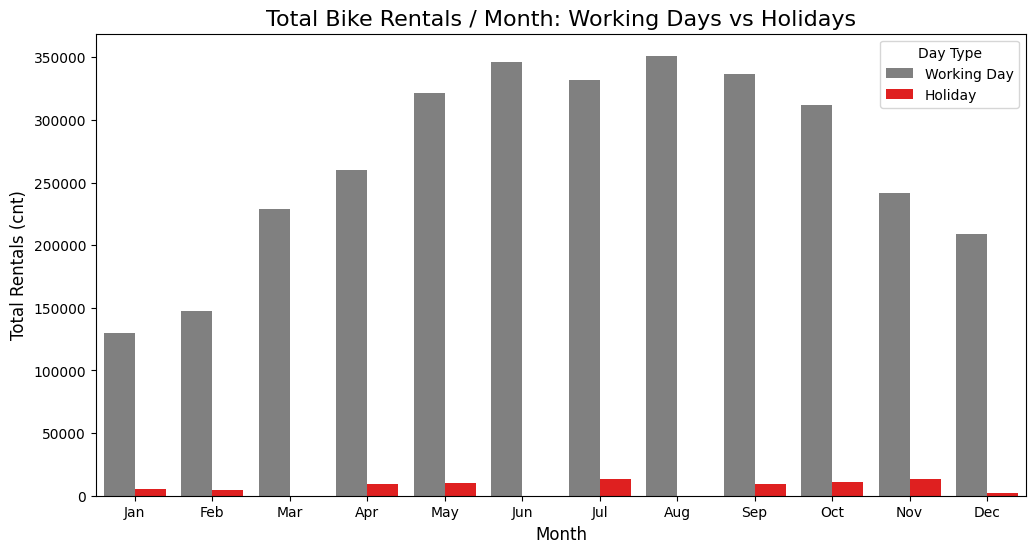

In [34]:
# Membuat Bar Chart untuk perbandingan
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', hue='holiday', data=monthly_rentals, palette={'Holiday': 'red', 'Working Day': 'grey'})

# Menentukan judul dan label pada sumbu diagram
plt.title('Total Bike Rentals / Month: Working Days vs Holidays', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rentals (cnt)', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Day Type')
plt.show()


**Insight:**
- Dari visualisasi, kita dapat melihat bahwa jumlah penyewaan sepeda biasanya lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Penyewaan sepeda secara umum lebih tinggi pada hari kerja, yang kemungkinan besar disebabkan oleh penggunaan sepeda sebagai transportasi ke tempat kerja atau sekolah. Pada hari libur, meskipun penyewaan masih ada, jumlahnya lebih rendah, kecuali pada bulan-bulan tertentu yang mungkin memiliki acara spesial atau musim liburan.

### Pertanyaan 2: Jam berapa saja waktu puncak untuk penyewaan sepeda?

Menghitung total penyewaan sepeda berdasarkan jam

In [35]:
hourly_rentals = hour_data_cleaned.groupby('hr')['cnt'].sum().reset_index()

Menampilkan hasilnya pada diagram garis

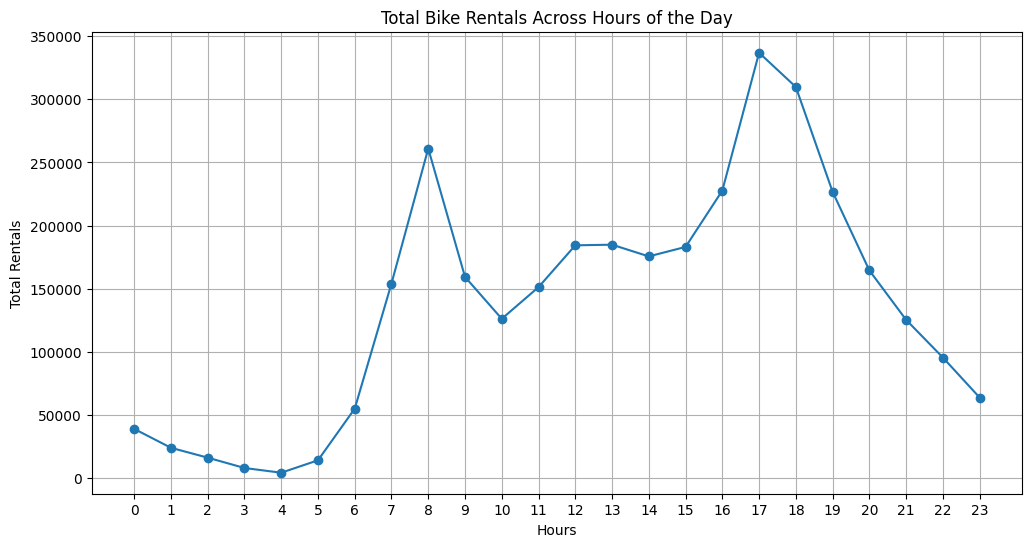

In [38]:
# Membuat grafik garis untuk visualisasi penyewaan berdasarkan jam
plt.figure(figsize=(12, 6))
plt.plot(hourly_rentals['hr'], hourly_rentals['cnt'], marker='o')
plt.title('Total Bike Rentals Across Hours of the Day')
plt.xlabel('Hours')
plt.ylabel('Total Rentals')
plt.xticks(hourly_rentals['hr'])
plt.grid()
plt.show()

**Insight:**
-  Sore hari (pukul 16:00 hingga 19:00) menunjukkan peningkatan tajam dalam jumlah penyewaan, dengan puncaknya pada pukul 17:00. Ini sangat mungkin terkait dengan waktu pulang kerja atau aktivitas sore lainnya.
- Pukul 17:00 adalah waktu puncak dengan jumlah penyewaan tertinggi sebanyak 336,860 kali.
- Pagi hari (pukul 08:00) juga merupakan waktu sibuk, yang bisa diasosiasikan dengan orang-orang berangkat ke tempat kerja atau sekolah.

## Analisis Lanjutan (Opsional)

Pengelompokkan Manual Untuk menetapkan berdasarkan Waktu

Pengelompokkan jam sibuk dan jam sepi dimana:

*   Jam Sibuk(Busy) adalah 7–9 pagi dan 5–7 sore
*   Jam Tenang(Quiet) adalah selain dari jam sibuk



In [39]:
# Mengkategorikan jam sibuk dan jam tenang
def categorize_hour(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Busy'
    else:
        return 'Quiet'

# Menambahkan kolom 'hour_type' berdasarkan kategori jam
hourly_rentals['hour_type'] = hourly_rentals['hr'].apply(categorize_hour)
print(hourly_rentals[['hr', 'hour_type']].head())


   hr hour_type
0   0     Quiet
1   1     Quiet
2   2     Quiet
3   3     Quiet
4   4     Quiet


Menampilkan perbandingannya dalam bentuk Diagram Batang

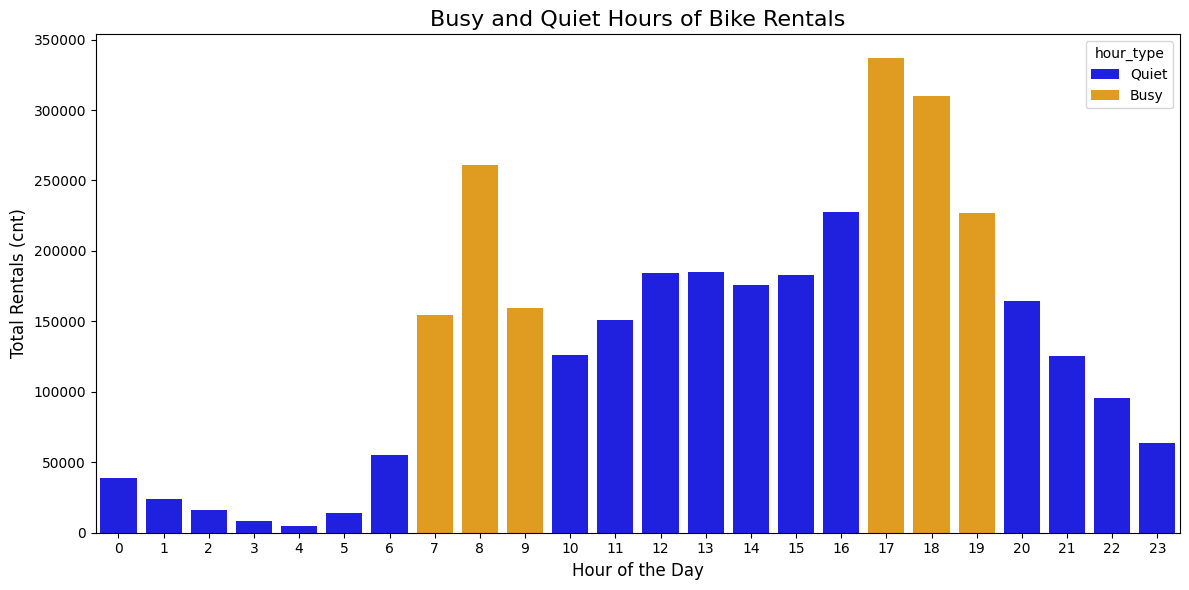

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
# Menentukan palet warna untuk membedakan jam sibuk dan tidak sibuk
sns.barplot(
    x='hr',
    y='cnt',
    hue='hour_type',
    data=hourly_rentals,
    palette={'Busy': 'orange', 'Quiet': 'blue'},
    ax=ax
)

# Menambahkan judul dan label sumbu
plt.title('Busy and Quiet Hours of Bike Rentals', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Rentals (cnt)', fontsize=12)
plt.tight_layout()
plt.show()

Pengelompokan penyewaan sepeda berdasarkan jam sibuk dan non-sibuk menunjukkan bagaimana pola penggunaan sepeda meningkat pada jam-jam tertentu. Peak hours biasanya terjadi selama jam kerja, seperti pagi hari saat orang pergi ke kantor dan sore hari saat mereka pulang. Pada Jam sibuk disarankan untuk menambah sepeda atau mempersiapkan strategi pengelolaan yang lebih baik pada waktu-waktu tertentu.

## Conclusion

## Conclution pertanyaan 1
**Perbandingan Sewa Sepeda pada Hari Kerja dengan Hari Libur**
*   Analisis menunjukkan bahwa total penyewaan sepeda pada hari kerja lebih tinggi dibandingkan pada hari libur. Ini mencerminkan pola penggunaan sepeda yang mungkin dipengaruhi oleh kebutuhan transportasi harian, seperti perjalanan ke tempat kerja atau sekolah.
*   Hal ini dapat menunjukkan bahwa ada potensi untuk mempromosikan penggunaan sepeda pada hari libur melalui kampanye atau program insentif. Mengingat banyak orang yang mungkin tidak menggunakan sepeda di akhir pekan, ada peluang untuk meningkatkan kesadaran dan penggunaan sepeda pada hari libur.


## Conclution pertanyaan 2
**Jam Puncak untuk Penyewaan Sepeda**
*   Data menunjukkan bahwa jam puncak penyewaan sepeda terjadi antara pukul 17.00 dan 18.00, dengan jumlah penyewaan tertinggi pada pukul 17.00 (336860 penyewaan). Ini mungkin bertepatan dengan waktu orang-orang pulang dari tempat kerja atau aktivitas sehari-hari.
*   Mengidentifikasi jam sibuk ini penting untuk pengelolaan armada sepeda. Pihak penyewa sepeda dapat mempertimbangkan untuk meningkatkan ketersediaan sepeda pada jam-jam ini atau menyediakan lebih banyak layanan untuk memenuhi permintaan yang meningkat. Strategi lain yang bisa diambil adalah meningkatkan infrastruktur, seperti jalur sepeda yang lebih aman dan nyaman pada jam-jam puncak tersebut.